# Salary Predictions Based on Job Descriptions

<img src="https://github.com/robinyUArizona/Portfolio-Job-Salary-Predictions-/blob/master/Salary_Pic.PNG?raw=true" style="width:1100px;height:300px" />

<h2>Table of content</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li>Personal information</a></li>
    <li>Import libraries and dependency files</a></li>
    <li>Defining Functions</a></li>
        <ul> 
            <li>Load files into pandas dataframe</a></li>
            <li>Merge training features and target label </a></li>
            <li>Display basic information about the data</a></li>
            <li>Statistical summary</a></li>
            <li>Visualize of the target label</a></li>
            <li>Clean data </a></li>
            <li>One-hot encoding</a></li>
            <li>Target dataframe</a></li>
            <li>Training Model </a></li>  
            <li>Summary of the Model</a></li>
            <li>Training Model </a></li>  
        </ul> 
    <li>Establish the base model</a></li>
    <li>Hypothesize the solutions using the best model</a></li>
    <li>Predict the target using best model</a></li>
    <li>Probability distribution curves between actual salary vs. predicted salary</a></li>
</ul>
    

</div>
 
<hr>

In [1]:
""" Information """

__author__ = "Robin Yadav"
__email__ = "yrobins95@gmail.com"

### Import libraries and dependency files

In [2]:
""" Import libraries """
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor



""" Importing functions from files """
import import_ipynb
import plot_job_features
from plot_job_features import plot_features


importing Jupyter notebook from plot_job_features.ipynb


### Defining Functions

In [3]:
""" Loads csv files into pandas dataframe """
def load_data(file):
    return pd.read_csv(file)

In [4]:
""" Merge train data and target data """
def integrate_data(df1, df2, key=None, left_index=False, right_index=False):
    return pd.merge(left=df1, right=df2, how='inner', on=key, left_index=left_index, right_index=right_index)
    

In [5]:
""" Function to print basic information about the data """
def data_info(df):
    display('Shape of the data: ', df.shape)
    display('=====================================================')
    display('Information of the data:')
    display(' ', df.info())    
    display('=====================================================')
    display('Check the duplication of the data:', df.duplicated().sum())
    display('=====================================================')
    display('Check the missing value of the data:', df.isnull().sum())
      

In [6]:
""" Function for Statistical summary""" 
def summary(df):
    display('==== Statistical Summary of Numerical data ====', df.describe(include=np.number))
    display('==== Statistical Summary of Categorical data ====',df.describe(include='O'))
    

In [7]:
""" Visualize the Salary Variable """
def visualize_salary(df_salary):
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.boxplot(df_salary)
    plt.subplot(1,2,2)
    sns.distplot(df_salary, bins=20)
    plt.show()

In [8]:
""" clean data 
    remove rows that contain salary <= 0 or duplicate job IDs, job IDs are unqiue   
"""
def clean_data(raw_df):
    ''''''
    clean_df = raw_df.drop_duplicates(subset='jobId')
    clean_df = clean_df[clean_df.salary>0]
    return clean_df


In [9]:
""" one-hot encoding on all categorical variables and combines result with continous variables """
def one_hot_encode_feature_df(df, cat_vars=None, num_vars=None):
    cat_df = pd.get_dummies(df[cat_vars]) # Convert categorical variable into dummy/indicator variables.
    num_df = df[num_vars].apply(pd.to_numeric) # just to make sure
    return pd.concat([cat_df, num_df], axis=1)

In [10]:
""" returns target dataframe """
def get_target_df(df, target):
    return df[target]


In [11]:
""" Training Model """
def train_model(model, feature_df, target_df, num_procs, mean_mse, cv_std):
    ## MSE is negative when returned by cross validation
    neg_mse = cross_val_score(model, feature_df, target_df, cv=2, n_jobs=num_procs, scoring='neg_mean_squared_error')
    mean_mse[model] = -1.0*np.mean(neg_mse)
    cv_std[model] = np.std(neg_mse)


In [12]:
""" Summary of the Model """
def print_summary(model, mean_mse, cv_std):
    print('\nModel:\n', model)
    print('Average MSE:\n', mean_mse[model])
    print('Standard deviation during CV:\n', cv_std[model])

In [13]:
# load data
train_data = load_data('data-SalaryPredictions/data/train_features.csv')
test_data = load_data('data-SalaryPredictions/data/test_features.csv')
salary_data = load_data('data-SalaryPredictions/data/train_salaries.csv')



In [14]:
# merging train data and target data
raw_train_df = integrate_data(train_data, salary_data, key='jobId')
print(" ")
display('============= Raw Training Dataframe =============', raw_train_df.head())

'============= Raw Training Dataframe ============='

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [15]:
# display the information of the Raw Training dataframe
display(data_info(raw_train_df))

# Summary Statistics for raw training datasets
summary(raw_train_df)

'Shape of the data: '

(1000000, 9)

'====================================================='

'Information of the data:'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


' '

None

'====================================================='

'Check the duplication of the data:'

0

'====================================================='

'Check the missing value of the data:'

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

None

'==== Statistical Summary of Numerical data ===='

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


'==== Statistical Summary of Categorical data ===='

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685020095,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


In [16]:
# define variables, this is found using raw_data_info()
categorical_vars = ['companyId', 'jobType', 'degree', 'major', 'industry']
numeric_vars = ['yearsExperience', 'milesFromMetropolis']
target_var = 'salary'

'Visulaize Target Varibale - Salary Data'

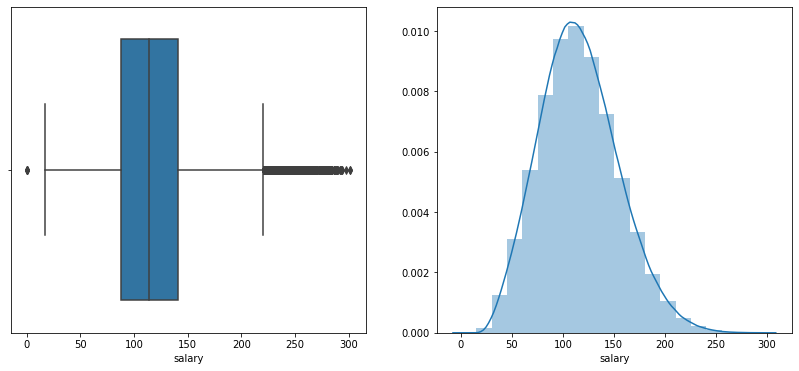

In [17]:
# Visualize target (Salary) data
display('Visulaize Target Varibale - Salary Data')
visualize_salary(raw_train_df.salary)


In [18]:
# clean, shuffle, and reindex training data -- shuffling improves cross-validation accuracy
clean_train_df = shuffle(clean_data(raw_train_df)).reset_index()

# summary of clean data
summary(clean_train_df)


'==== Statistical Summary of Numerical data ===='

,index,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000,999995.000000
mean,499999.177092,11.992407,49.529381,116.062398
std,288675.219219,7.212390,28.877721,38.717163
min,0.000000,0.000000,0.000000,17.000000
25%,249999.500000,6.000000,25.000000,88.000000
50%,499999.000000,12.000000,50.000000,114.000000
75%,749998.500000,18.000000,75.000000,141.000000
max,999999.000000,24.000000,99.000000,301.000000


'==== Statistical Summary of Categorical data ===='

,jobId,companyId,jobType,degree,major,industry
count,999995,999995,999995,999995,999995,999995
unique,999995,63,8,5,9,7
top,JOB1362685020095,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236975,532353,143205


In [19]:
# encode categorical data and get final feature dfs
print("Encoding data: \n")
feature_df = one_hot_encode_feature_df(clean_train_df, cat_vars=categorical_vars, num_vars=numeric_vars)
test_df = one_hot_encode_feature_df(test_data, cat_vars=categorical_vars, num_vars=numeric_vars)

# get target df
target_df = get_target_df(clean_train_df, target_var)
display(target_df)

Encoding data: 



0          88
1          79
2         174
3         122
4         179
         ... 
999990    197
999991    112
999992    120
999993    102
999994    109
Name: salary, Length: 999995, dtype: int64

In [20]:
feature_df.head()


,companyId_COMP0,companyId_COMP1,companyId_COMP10,companyId_COMP11,companyId_COMP12,companyId_COMP13,companyId_COMP14,companyId_COMP15,companyId_COMP16,companyId_COMP17,...,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,yearsExperience,milesFromMetropolis
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,3,14
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,8,35
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,19,84
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,10,46
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,19,33


### Establish a baseline model
<p3>Since this problem is regression problem, we can use linear regression as base model and then we can implement another algorithm to predict salary
</p3>

In [21]:
lr = LinearRegression()

mean_mse = {}
cv_std = {}
num_procs = 2

train_model(lr, feature_df, target_df, num_procs, mean_mse, cv_std)
print_summary(lr, mean_mse, cv_std) 


Model:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Average MSE:
 384.4620795467532
Standard deviation during CV:
 0.05154281951965345


### Hypothesize the Solution

<ul>
    <li>We choose the following model which may be good fit to solve the salary job prediction:  
        <ul>
            <li>1. Model pipeline using StandardScaler()-scaling to unit variance, PCA()-Projecting higher dimensional to lower dimensional space, LinearRegression() </li>
            <li>2. RandomForestRegressor()- A random forest is a meta estimator that is good for predictive accuracy and control over-fitting.</li>
            <li>3. GradientBoostingRegressor()- This cab used for both regression and classification problems, which is an ensemble of weak prediction models, typically decision trees</li>
        </ul>
    </li>
</ul>
<p1> </p1>

In [22]:
# intialize the model list and dicts
models = []
mean_mse = {}
cv_std = {}
# res = {}

# define number of processes to run in parallel
num_procs = 2

# shared model parameters
verbose_lvl = 0


# create models -- hyperparamters tuning 
lr_std_pca = make_pipeline(StandardScaler(), PCA(), LinearRegression())
rf = RandomForestRegressor(n_estimators=150, n_jobs=num_procs, max_depth=25, min_samples_split=60, \
                          max_features=30, verbose=verbose_lvl)

gbm = GradientBoostingRegressor(n_estimators=150, max_depth=5, loss='ls', verbose=verbose_lvl)

# list all models
models.extend([lr_std_pca, rf, gbm])

#parallel cross-validate models, using MSE as evaluation metric, and print summaries
print("Beginning cross validation")
for model in models:
    train_model(model, feature_df, target_df, num_procs, mean_mse, cv_std)
    print_summary(model, mean_mse, cv_std) 


Beginning cross validation

Model:
 Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)
Average MSE:
 384.4615824815875
Standard deviation during CV:
 0.045991448965651216

Model:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features=30, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=60,
                      min_weight_fraction_leaf=0.0, n_estimators=150, n_j

In [23]:
#choose model with lowest mse
model = min(mean_mse, key=mean_mse.get)
print('\nPredictions calculated using model with lowest MSE:')
print(model)



Predictions calculated using model with lowest MSE:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


### Tune the best model


In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
""" Need GPU """
# # Search for best parameters
# parameter = {'n_estimators':[100,150,200,250],
#             'max_depth':[4,5,6,7],
#             'learning_rate':[0.1,0.2,0.3,0.4]
#             }

# def param_search(param_grid, n_jobs):
#     estimator = GradientBoostingRegressor() 
#     #cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.2)
#     GridCV= GridSearchCV(estimator=estimator, cv=2, param_grid=param_grid, n_jobs=n_jobs) 
#     GridCV.fit(feature_df, target_df) 

#     return GridCV.best_params_ 

# param_search(parameter,2)

' Need GPU '

### Predict the salary using GradientBoostingRegressor() 

In [26]:

best_model = GradientBoostingRegressor(n_estimators=250,learning_rate=0.1, max_depth=5)

best_model.fit(feature_df, target_df)



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=250,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
# Salary predictions 
predict_salary = best_model.predict(test_df)
display(predict_salary)
display(target_df)

array([111.20049968,  93.63783279, 180.48971027, ...,  55.43473178,
       159.64760256, 114.85928063])

0          88
1          79
2         174
3         122
4         179
         ... 
999990    197
999991    112
999992    120
999993    102
999994    109
Name: salary, Length: 999995, dtype: int64

### Probability distribution curves between actual salary vs. predicted salary

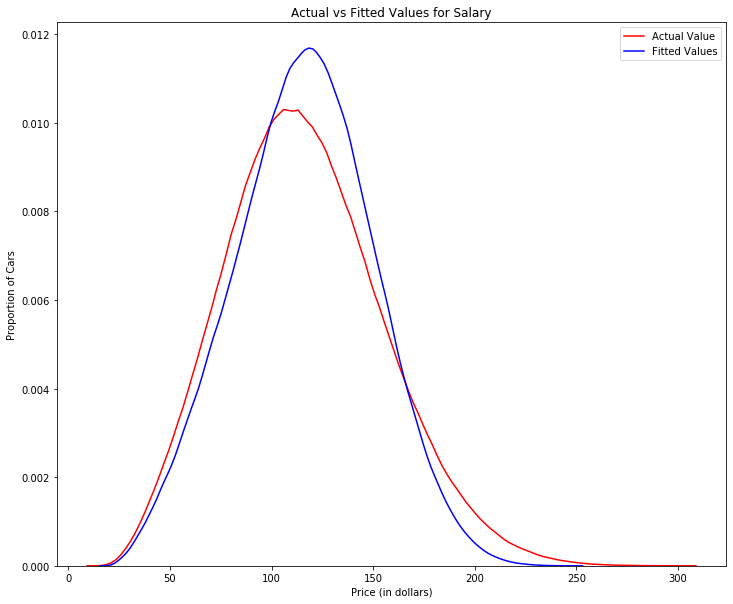

In [28]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(target_df, hist=False, color="r", label="Actual Value")
sns.distplot(predict_salary, hist=False, color="b", label="Fitted Values", ax=ax1)


plt.title('Actual vs Fitted Values for Salary')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()